In [1]:
from Bio.PDB import *
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParam import ProtParamData
import nglview as nv
import ipywidgets

import warnings
warnings.filterwarnings('ignore')

In [2]:
parser = PDBParser()

In [3]:
structure = parser.get_structure("PHA-L", "central_str.pdb")

In [4]:
view = nv.show_biopython(structure)
view

NGLWidget()

In [5]:
# .get_residues() method in a loop
for model in structure:
    for residue in model.get_residues():
        print(residue)
# .get_residues() method as generator object
residues = structure.get_residues() # returns a generator object
[item for item in residues]
# .unfold_entities - keyword for each level of the SMCRA structure
Selection.unfold_entities(structure, "R") # R is for residues

<Residue LYS het=  resseq=1 icode= >
<Residue PRO het=  resseq=2 icode= >
<Residue VAL het=  resseq=3 icode= >
<Residue SER het=  resseq=4 icode= >
<Residue LEU het=  resseq=5 icode= >
<Residue SER het=  resseq=6 icode= >
<Residue TYR het=  resseq=7 icode= >
<Residue ARG het=  resseq=8 icode= >
<Residue CYS het=  resseq=9 icode= >
<Residue PRO het=  resseq=10 icode= >
<Residue CYS het=  resseq=11 icode= >
<Residue ARG het=  resseq=12 icode= >
<Residue PHE het=  resseq=13 icode= >
<Residue PHE het=  resseq=14 icode= >
<Residue GLU het=  resseq=15 icode= >
<Residue SER het=  resseq=16 icode= >
<Residue HIS het=  resseq=17 icode= >
<Residue VAL het=  resseq=18 icode= >
<Residue ALA het=  resseq=19 icode= >
<Residue ARG het=  resseq=20 icode= >
<Residue ALA het=  resseq=21 icode= >
<Residue ASN het=  resseq=22 icode= >
<Residue VAL het=  resseq=23 icode= >
<Residue LYS het=  resseq=24 icode= >
<Residue HIS het=  resseq=25 icode= >
<Residue LEU het=  resseq=26 icode= >
<Residue LYS het=  re

[<Residue LYS het=  resseq=1 icode= >,
 <Residue PRO het=  resseq=2 icode= >,
 <Residue VAL het=  resseq=3 icode= >,
 <Residue SER het=  resseq=4 icode= >,
 <Residue LEU het=  resseq=5 icode= >,
 <Residue SER het=  resseq=6 icode= >,
 <Residue TYR het=  resseq=7 icode= >,
 <Residue ARG het=  resseq=8 icode= >,
 <Residue CYS het=  resseq=9 icode= >,
 <Residue PRO het=  resseq=10 icode= >,
 <Residue CYS het=  resseq=11 icode= >,
 <Residue ARG het=  resseq=12 icode= >,
 <Residue PHE het=  resseq=13 icode= >,
 <Residue PHE het=  resseq=14 icode= >,
 <Residue GLU het=  resseq=15 icode= >,
 <Residue SER het=  resseq=16 icode= >,
 <Residue HIS het=  resseq=17 icode= >,
 <Residue VAL het=  resseq=18 icode= >,
 <Residue ALA het=  resseq=19 icode= >,
 <Residue ARG het=  resseq=20 icode= >,
 <Residue ALA het=  resseq=21 icode= >,
 <Residue ASN het=  resseq=22 icode= >,
 <Residue VAL het=  resseq=23 icode= >,
 <Residue LYS het=  resseq=24 icode= >,
 <Residue HIS het=  resseq=25 icode= >,
 <Residue

In [6]:
polypeptide_builder = CaPPBuilder()
counter = 1
for polypeptide in polypeptide_builder.build_peptides(structure):
    seq = polypeptide.get_sequence()
    print(f"Sequence: {counter}, Length: {len(seq)}")
    print(seq)
    counter += 1

Sequence: 1, Length: 68
KPVSLSYRCPCRFFESHVARANVKHLKILNTPNCALQIVARLKNNNRQVCIDPKLKWIQEYLEKALNK


In [7]:
ppb = CaPPBuilder()

# Create empty list for chains
all_seqs = []
counter = 1

# For each polypeptide in the structure, run protein analysis methods and store in dict
for pp in ppb.build_peptides(structure):
    seq_info = {}
    seq = pp.get_sequence()
    analyzed_seq = ProteinAnalysis(str(seq)) # needs to be a str

    seq_info['Sequence Number'] = counter # set sequence id
    seq_info['Sequence'] = seq # store Seq() object
    seq_info['Sequence Length'] = len(seq) # length of seq
    seq_info['Molecular Weight'] = round(analyzed_seq.molecular_weight(), 2) # mol weight
    seq_info['GRAVY'] = round(analyzed_seq.gravy(), 4) # average hydrophobicity
    seq_info['Amino Acid Count'] = analyzed_seq.count_amino_acids() # count residues
    seq_info['Amino Acid Percent'] = analyzed_seq.get_amino_acids_percent() # normalized count
    seq_info['Secondary Structure'] = analyzed_seq.secondary_structure_fraction() # helix, turn, sheet
    
    # Update all_seqs list and increase counter
    all_seqs.append(seq_info)
    counter += 1

In [8]:
all_seqs[0]['Molecular Weight']

7963.34

In [9]:
seq1 = all_seqs[0]['Sequence']

In [10]:
analysed_seq = ProteinAnalysis(str(seq1))

In [11]:
analysed_seq.count_amino_acids()

{'A': 5,
 'C': 4,
 'D': 1,
 'E': 3,
 'F': 2,
 'G': 0,
 'H': 2,
 'I': 4,
 'K': 8,
 'L': 8,
 'M': 0,
 'N': 7,
 'P': 4,
 'Q': 3,
 'R': 5,
 'S': 3,
 'T': 1,
 'V': 5,
 'W': 1,
 'Y': 2}

In [12]:
analysed_seq.get_amino_acids_percent()

{'A': 0.07352941176470588,
 'C': 0.058823529411764705,
 'D': 0.014705882352941176,
 'E': 0.04411764705882353,
 'F': 0.029411764705882353,
 'G': 0.0,
 'H': 0.029411764705882353,
 'I': 0.058823529411764705,
 'K': 0.11764705882352941,
 'L': 0.11764705882352941,
 'M': 0.0,
 'N': 0.10294117647058823,
 'P': 0.058823529411764705,
 'Q': 0.04411764705882353,
 'R': 0.07352941176470588,
 'S': 0.04411764705882353,
 'T': 0.014705882352941176,
 'V': 0.07352941176470588,
 'W': 0.014705882352941176,
 'Y': 0.029411764705882353}

In [13]:
def analyze_protein(structure):
    all_seqs = []
    counter = 1
    
    # For each polypeptide in the structure, run protein analysis methods and store in dict
    for pp in ppb.build_peptides(structure):
        seq_info = {}
        seq = pp.get_sequence()
        analyzed_seq = ProteinAnalysis(str(seq)) # needs to be a str

        seq_info['Sequence Number'] = counter # set sequence id
        seq_info['Sequence'] = seq # store Seq() object
        seq_info['Sequence Length'] = len(seq) # length of seq
        seq_info['Molecular Weight'] = round(analyzed_seq.molecular_weight(), 2) # mol weight
        seq_info['GRAVY'] = round(analyzed_seq.gravy(), 4) # average hydrophobicity
        seq_info['Amino Acid Count'] = analyzed_seq.count_amino_acids() # count residues
        seq_info['Amino Acid Percent'] = analyzed_seq.get_amino_acids_percent() # normalized count
        seq_info['Secondary Structure'] = analyzed_seq.secondary_structure_fraction() # helix, turn, sheet

        # Update all_seqs list and increase counter
        all_seqs.append(seq_info)
        counter += 1
    return all_seqs

In [14]:
analyze_protein(structure)

[{'Sequence Number': 1,
  'Sequence': Seq('KPVSLSYRCPCRFFESHVARANVKHLKILNTPNCALQIVARLKNNNRQVCIDPK...LNK'),
  'Sequence Length': 68,
  'Molecular Weight': 7963.34,
  'GRAVY': -0.4132,
  'Amino Acid Count': {'A': 5,
   'C': 4,
   'D': 1,
   'E': 3,
   'F': 2,
   'G': 0,
   'H': 2,
   'I': 4,
   'K': 8,
   'L': 8,
   'M': 0,
   'N': 7,
   'P': 4,
   'Q': 3,
   'R': 5,
   'S': 3,
   'T': 1,
   'V': 5,
   'W': 1,
   'Y': 2},
  'Amino Acid Percent': {'A': 0.07352941176470588,
   'C': 0.058823529411764705,
   'D': 0.014705882352941176,
   'E': 0.04411764705882353,
   'F': 0.029411764705882353,
   'G': 0.0,
   'H': 0.029411764705882353,
   'I': 0.058823529411764705,
   'K': 0.11764705882352941,
   'L': 0.11764705882352941,
   'M': 0.0,
   'N': 0.10294117647058823,
   'P': 0.058823529411764705,
   'Q': 0.04411764705882353,
   'R': 0.07352941176470588,
   'S': 0.04411764705882353,
   'T': 0.014705882352941176,
   'V': 0.07352941176470588,
   'W': 0.014705882352941176,
   'Y': 0.02941176470588235

In [15]:
structure

<Structure id=PHA-L>

In [16]:
data=structure
model = data.get_models() 
model 

models = list(model) 

type(models[0]) 


Bio.PDB.Model.Model

In [17]:
chains = list(models[0].get_chains()) 
chains

[<Chain id= >]

In [18]:
len(chains)

1

In [19]:
residue = list(chains[0].get_residues())
len(residue) 

68

In [20]:
atoms = list(residue[24].get_atoms()) 
atoms


[<Atom N>,
 <Atom H>,
 <Atom CA>,
 <Atom CB>,
 <Atom CG>,
 <Atom ND1>,
 <Atom CD2>,
 <Atom CE1>,
 <Atom NE2>,
 <Atom HE2>,
 <Atom C>,
 <Atom O>]

In [21]:
len(atoms)

12

In [22]:
atoms[1].get_vector() 

<Vector -4.12, 8.96, 3.85>

In [23]:
import requests
import lxml.html as lh
import pandas as pd
import xlwt
from tempfile import TemporaryFile
import xlrd
from xlrd import open_workbook
import xlsxwriter

In [24]:
#Extracting x,y,z co-ordinates of each atom
x_coor=[]
y_coor=[]
z_coor=[]
res_len=len(residue) 
for i in range(res_len):
    atoms=list(residue[i].get_atoms())
    atoms_len=len(atoms)
    for j in range (atoms_len):        
        x_coor.append(float(atoms[j].get_vector()[0]))
        y_coor.append(float(atoms[j].get_vector()[1]))
        z_coor.append(float(atoms[j].get_vector()[2]))

In [25]:
df = pd.DataFrame() 
df['x co-ordinate'] = x_coor 
df['y co-ordinate'] = y_coor
df['z co-ordinate'] = z_coor
# Storing the co-ordinates to excel file
df.to_csv('PDB.csv', index = False) 

In [26]:
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [27]:
'''csvFileName = 'PDB.csv'
csvData = []
with open(csvFileName, 'r') as csvFile:
    csvReader = csv.reader(csvFile, delimiter=' ')
    for csvRow in csvReader:
        csvData.append(csvRow)

# Get X, Y, Z
csvData = np.array(csvData)
csvData = csvData.astype(np.float)
X, Y, Z = csvData[:,0], csvData[:,1], csvData[:,2]

# Plot X,Y,Z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X, Y, Z, color='white', edgecolors='grey', alpha=0.5)
ax.scatter(X, Y, Z, c='red')
plt.show()
'''

"csvFileName = 'PDB.csv'\ncsvData = []\nwith open(csvFileName, 'r') as csvFile:\n    csvReader = csv.reader(csvFile, delimiter=' ')\n    for csvRow in csvReader:\n        csvData.append(csvRow)\n\n# Get X, Y, Z\ncsvData = np.array(csvData)\ncsvData = csvData.astype(np.float)\nX, Y, Z = csvData[:,0], csvData[:,1], csvData[:,2]\n\n# Plot X,Y,Z\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\nax.plot_trisurf(X, Y, Z, color='white', edgecolors='grey', alpha=0.5)\nax.scatter(X, Y, Z, c='red')\nplt.show()\n"

In [28]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

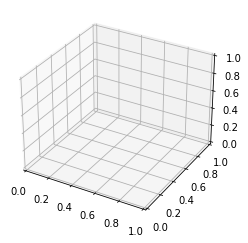

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')

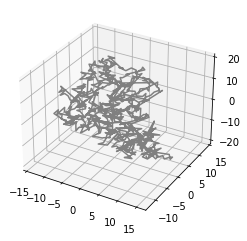

In [30]:
ax = plt.axes(projection='3d')
ax.plot3D(x_coor, y_coor, z_coor, 'gray')

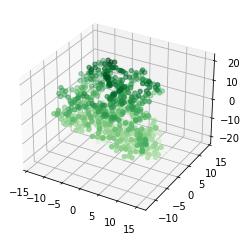

In [31]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_coor, y_coor, z_coor, c=z_coor, cmap='Greens');

In [32]:
#Extreme points of the co-ordinates

min_x=min(x_coor)
min_y=min(y_coor)
min_z=min(z_coor)

max_x=max(x_coor)
max_y=max(y_coor)
max_z=max(z_coor)

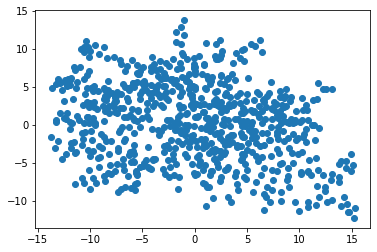

In [33]:
plt.scatter(x_coor,y_coor)
#plt.savefig('plotx_y.png', dpi=100, bbox_inches='tight')

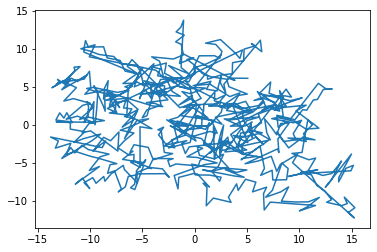

In [34]:
plt.plot(x_coor,y_coor)
plt.savefig('plotx_y.png', dpi=100, bbox_inches='tight')

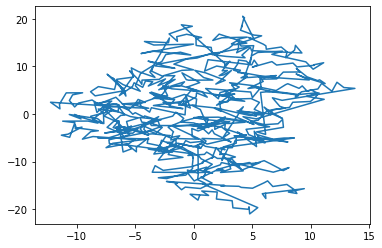

In [35]:
plt.plot(y_coor,z_coor)
plt.savefig('ploty_z.png', dpi=100, bbox_inches='tight')

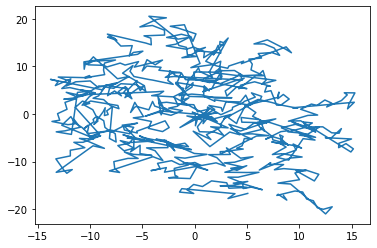

In [36]:
plt.plot(x_coor,z_coor)
plt.savefig('plotx_z.png', dpi=100, bbox_inches='tight')